In [8]:
print(gray_image)

[[165.982 165.683 163.667 ... 169.072 175.274 149.103]
 [165.982 165.096 163.667 ... 172.018 180.291 153.389]
 [165.86  162.626 163.091 ... 144.086 127.274  91.878]
 ...
 [ 51.986  54.212  54.511 ...  72.12   88.81   92.387]
 [ 48.885  52.285  51.864 ...  88.035 100.782  99.918]
 [ 46.382  54.356  50.391 ...  98.966 105.378 107.615]]


In [10]:
new_im = Image.fromarray(gray_image)
new_im.show()

In [5]:
import numpy as np
numpy_array = np.array(img)
print(numpy_array)

[[[225 137 127]
  [224 137 127]
  [227 134 119]
  ...
  [227 141 128]
  [232 150 124]
  [213 120 104]]

 [[225 137 127]
  [224 136 127]
  [227 134 119]
  ...
  [230 144 130]
  [238 155 126]
  [219 124 105]]

 [[227 137 122]
  [224 134 118]
  [228 133 117]
  ...
  [209 113 106]
  [189  97  96]
  [149  61  80]]

 ...

 [[ 90  28  60]
  [ 95  29  61]
  [ 97  28  63]
  ...
  [126  42  68]
  [148  58  73]
  [158  59  73]]

 [[ 87  24  61]
  [ 92  27  62]
  [ 95  25  61]
  ...
  [143  58  78]
  [167  67  80]
  [169  65  78]]

 [[ 84  22  58]
  [ 95  29  62]
  [ 93  24  59]
  ...
  [159  67  84]
  [176  70  81]
  [182  71  80]]]


In [11]:
gray_image.shape

(220, 220)

In [45]:
kernel_matrix = np.array([[1, 0, -1],[2, 0, -2],[1, 0, -1]])
left_padding = int(kernel_matrix.shape[0]/2)
right_padding = int(kernel_matrix.shape[1]/2)
q = np.zeros((gray_image.shape[0]+kernel_matrix.shape[0]-1, gray_image.shape[1]+kernel_matrix.shape[1]-1))

In [46]:
for i in range(len(gray_image)):
    for j in range(len(gray_image[i])):
        q[i+left_padding][j+right_padding] = gray_image[i][j]
        

In [47]:
q

array([[  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ],
       [  0.   , 165.982, 165.683, ..., 175.274, 149.103,   0.   ],
       [  0.   , 165.982, 165.096, ..., 180.291, 153.389,   0.   ],
       ...,
       [  0.   ,  48.885,  52.285, ..., 100.782,  99.918,   0.   ],
       [  0.   ,  46.382,  54.356, ..., 105.378, 107.615,   0.   ],
       [  0.   ,   0.   ,   0.   , ...,   0.   ,   0.   ,   0.   ]])

In [51]:
im2 = Image.fromarray(q)
im2.show()


In [39]:
print(left_padding)

1


In [52]:
def convolution(image, kernel):
    convolued_image = np.sum(np.multiply(image, kernel))
    return convolued_image

In [53]:
out = convolution(q, kernel_matrix)

ValueError: operands could not be broadcast together with shapes (222,222) (3,3) 

In [58]:
out = np.zeros(gray_image.shape)
print(kernel_matrix.shape)

(3, 3)


In [61]:
for i in range(gray_image.shape[0]):
    for j in range(gray_image.shape[1]):
        temp = q[i:i+kernel_matrix.shape[0],j:j+kernel_matrix.shape[1]]
#         print(temp.shape)
        out[i][j] = convolution(temp, kernel_matrix)

print(out)

[[-496.462    6.945   -4.175 ... -130.378   58.567  530.839]
 [-658.501    9.714   -5.083 ... -129.027  109.435  663.13 ]
 [-651.811    6.679   -3.322 ...   26.656  152.183  488.165]
 ...
 [-217.579   -9.956  -14.121 ...  -85.941  -78.72   345.505]
 [-213.138  -12.492  -14.73  ...  -99.186  -52.682  395.752]
 [-160.997  -10.997   -7.354 ...  -64.377  -29.181  311.538]]


In [62]:
im2 = Image.fromarray(out)
im2.show()


In [71]:
class Image_processing:
    
    def rgb_to_grey(self, colored_image):
        return np.dot(colored_image[...,:3], [0.299, 0.587, 0.144])
    
    def __apply_kernel(self, image, kernel):
        return np.sum(np.multiply(image, kernel))
    
    def __zero_padding(self, image_matrix, kernel_matrix):
        left_padding = int(kernel_matrix.shape[0]/2)
        upper_padding = int(kernel_matrix.shape[1]/2)
        padded_image = np.zeros((gray_image.shape[0]+kernel_matrix.shape[0]-1, gray_image.shape[1]+kernel_matrix.shape[1]-1))
        for i in range(len(image_matrix)):
            for j in range(len(image_matrix[i])):
                padded_image[i+left_padding][j+upper_padding] = image_matrix[i][j]
        return padded_image
    
    def convolution(self, image, kernel):
        convolved_image = np.zeros(image.shape)
        padded_image = self.__zero_padding(image, kernel)
        for i in range(gray_image.shape[0]):
            for j in range(gray_image.shape[1]):
                temp = padded_image[i:i+kernel_matrix.shape[0],j:j+kernel_matrix.shape[1]]
                convolved_image[i][j] = convolution(temp, kernel_matrix)
        return convolved_image

    def read_image(self, path):
        return Image.open(path)
    
    def image_to_numpy_array(self, image):
        return np.array(image)
    
    def numpy_array_to_image(self, numpy_array):
        return Image.fromarray(numpy_array)
    

In [72]:
image_processing = Image_processing()

In [76]:
image = image_processing.read_image('image_2.png')
numpy_array = image_processing.image_to_numpy_array(image)
grey_image = image_processing.rgb_to_grey(numpy_array)
kernel_matrix = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
out = image_processing.convolution(grey_image, kernel_matrix)
result = image_processing.numpy_array_to_image(out)
result.show()

In [77]:
out.shape

(220, 220)

In [3]:
def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [47]:
import random
def high_threshold(high, threshold):
    for row in range(len(high)):
        for col in range(len(high)):
            if high[row][col] > threshold:
                high[row][col] = threshold
#     high = np.array(high)
#     out = np.clip(high, high.min(), threshold)
#     print(high)
    return high


In [48]:
def sp_noise(image, prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

In [49]:
def apply_kernel(image, kernel):
    return np.sum(np.multiply(image, kernel))

def zero_padding(image_matrix, kernel_matrix):
    left_padding = int(kernel_matrix.shape[0]/2)
    upper_padding = int(kernel_matrix.shape[1]/2)
    padded_image = np.zeros((image_matrix.shape[0]+kernel_matrix.shape[0]-1, image_matrix.shape[1]+kernel_matrix.shape[1]-1))
    for i in range(len(image_matrix)):
        for j in range(len(image_matrix[i])):
            padded_image[i+left_padding][j+upper_padding] = image_matrix[i][j]
    return padded_image

def convolution(image, kernel):
    convolved_image = np.zeros(image.shape)
    padded_image = zero_padding(image, kernel)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            temp = padded_image[i:i+kernel.shape[0],j:j+kernel.shape[1]]
            convolved_image[i][j] = apply_kernel(temp, kernel)
    return convolved_image


In [51]:
def gaussian_kernel(size, sigma=1):
        size = int(size) // 2
        x, y = np.mgrid[-size:size+1, -size:size+1]
        normal = 1 / (2.0 * np.pi * sigma**2)
        g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
        return g

807.6732788085938
1153.819
-125.651


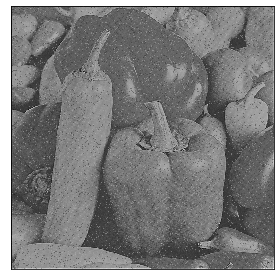

7.2710854e-10


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pywt
import pywt.data
from PIL import Image


def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])
# Load image
original = pywt.data.camera()
original = Image.open('image_3.png')
original = rgb2gray(np.array(original))
op = original
kernel = np.array([[0,-1, 0],[-1, 4, -1],[0, -1, 0]])
original = original+sp_noise(original, 0.05)+convolution(original, kernel)
original = Image.fromarray(original)
# original.show()
g_kernel = gaussian_kernel(3)
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail', 'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'haar')

LL, (LH, HL, HH) = coeffs2
# print(HH)
# LL = LL.astype(np.float64)
# LH = LH.astype(np.float64)
# HL = HL.astype(np.float64)
# HH = HH.astype(np.float64)
print(LL.max()*0.7)
# LL = convolution(LL, g_kernel)
# HH = cv2.GaussianBlur(HH,(5,5),0)
HH = high_threshold(HH, (HH.max()-HH.min())/2)
# LH = high_threshold(LH, -10)
# HL = high_threshold(HL, -10)
# LL = high_threshold(LL, np.array(LL).max()*0.1)
print(LL.max())
print(LL.min())
# print(HH)
coffs2=LL,(LH,HL,HH)
origin=pywt.idwt2(coffs2,'haar')
# im = Image.fromarray(origin)
# im.show()
# cv2.imshow('image',origin)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# print(LL)
# fig = plt.figure(figsize=(12, 3))
# for i, a in enumerate([LL, LH, HL, HH]):
#     ax = fig.add_subplot(1, 4, i + 1)
#     ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
#     ax.set_title(titles[i], fontsize=10)
#     ax.set_xticks([])
#     ax.set_yticks([])

# fig.tight_layout()
# plt.show()
fig = plt.figure()

ax = fig.add_subplot(111)
ax.imshow(origin, interpolation = "nearest", cmap = plt.cm.gray)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
plt.show()

MSE = np.square(np.subtract(origin,original)).mean() 
print(MSE)
# plt.savefig('op.png')